In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#https://github.com/tensorflow/tensorflow/blob/r1.6/tensorflow/examples/tutorials/layers/cnn_mnist.py
#https://github.com/tensorflow/models/blob/master/official/mnist/mnist.py
#https://gist.github.com/saitodev/8532cf9e94a9490f75a9bce678751aec
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


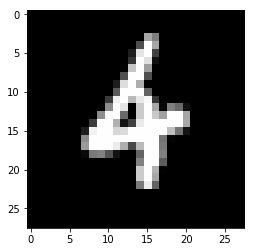

In [6]:
import matplotlib.pyplot as plt
batch = mnist.train.next_batch(1)
plotData1 = batch[0]
plotData1 = plotData1.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData1)
plt.show()

In [21]:
# https://github.com/SalilVishnuKapur/MachineLearning_Workbook/blob/master/ML_Assignment6/MNIST_conv2.ipynb

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [22]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [23]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [11]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [12]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [13]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [19]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [20]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

arrTrain = np.ndarray((22,1), dtype = float)
arrTest = np.ndarray((22,1), dtype = float)
count = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2200):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x: batch[0], y_: batch[1], keep_prob: 1.0})
            arrTrain[count] = train_accuracy
            count+=1
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    count = 0 
    for i in range(2200):
        batch = mnist.test.next_batch(50)
        if i % 100 == 0:
            test_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('test accuracy %g' % test_accuracy)
            arrTest[count] = test_accuracy
            count+=1

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

step 0, training accuracy 0.14
step 100, training accuracy 0.8
step 200, training accuracy 0.92
step 300, training accuracy 0.98
step 400, training accuracy 0.96
step 500, training accuracy 0.96
step 600, training accuracy 0.96
step 700, training accuracy 0.98
step 800, training accuracy 0.98
step 900, training accuracy 1
step 1000, training accuracy 0.96
step 1100, training accuracy 0.98
step 1200, training accuracy 0.94
step 1300, training accuracy 0.94
step 1400, training accuracy 0.98
step 1500, training accuracy 0.96
step 1600, training accuracy 0.98
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 0.96
step 2000, training accuracy 0.98
step 2100, training accuracy 0.96
test accuracy 0.98
test accuracy 0.94
test accuracy 1
test accuracy 0.94
tes

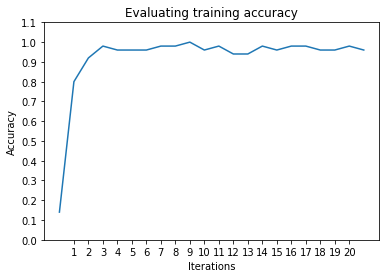

In [23]:
import matplotlib.pyplot as plt
plt.plot(arrTrain)
plt.yticks(np.arange(0.0, 1.2, 0.1))
plt.xticks(np.arange(1,21))
plt.title('Evaluating training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.show()

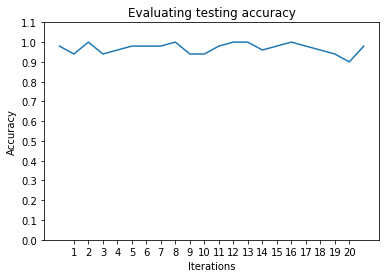

In [24]:
import matplotlib.pyplot as plt
plt.plot(arrTest)
plt.yticks(np.arange(0.0, 1.2, 0.1))
plt.xticks(np.arange(1,21))
plt.title('Evaluating testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.show()